# Traffic Light Detection for Carla


In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
import time
from glob import glob
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

## Object detection imports

Here are the imports from the object detection module

In [2]:
os.chdir('/home/carla/.local/lib/python3.6/site-packages/tensorflow/models/research')
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## Model preparation

In [3]:
Mobile_Net_SIM = '/home/carla/Desktop/Carla_Traffic_Light_Detection/output_inference_graph_sim/frozen_inference_graph.pb'
Mobile_Net_REAL = '/home/carla/Desktop/Carla_Traffic_Light_Detection/output_inference_graph_real/frozen_inference_graph.pb'
PATH_TO_LABELS = '/home/carla/Desktop/Carla_Traffic_Light_Detection/label_map.pbtxt'
NUM_CLASSES = 4

## Load Label Map and Create Category Index

In [4]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'Other'}}


In [5]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## Prediction : SSD Mobilenet Model Test on Simulator Images 

In [6]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  graph_def = tf.GraphDef()

  with tf.gfile.GFile(Mobile_Net_SIM, 'rb') as fid:
        
    serialized_graph = fid.read()
    graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(graph_def, name='')

In [7]:
DIR_SIM_TEST_IMAGES = '/home/carla/Desktop/Carla_Traffic_Light_Detection/test_images_sim'
TEST_IMAGE_PATHS = glob(os.path.join(DIR_SIM_TEST_IMAGES, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))
# Size, in inches, of the output images.
IMAGE_SIZE = (13,9)

Length of test images: 12


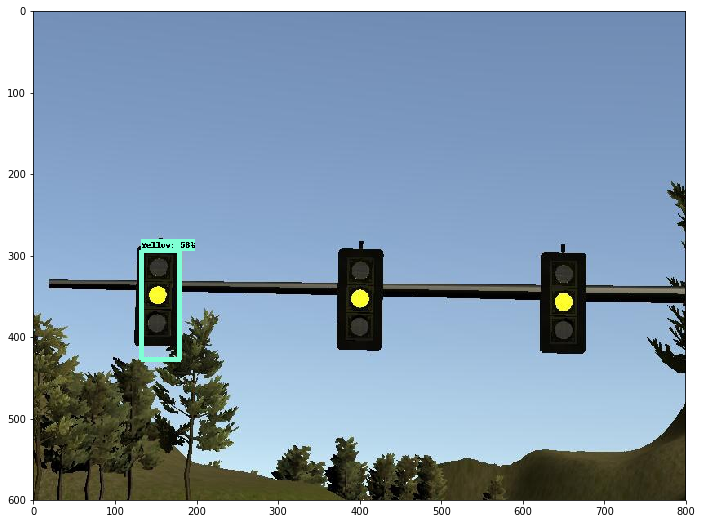

Yellow 0.587982
Red 0.391099


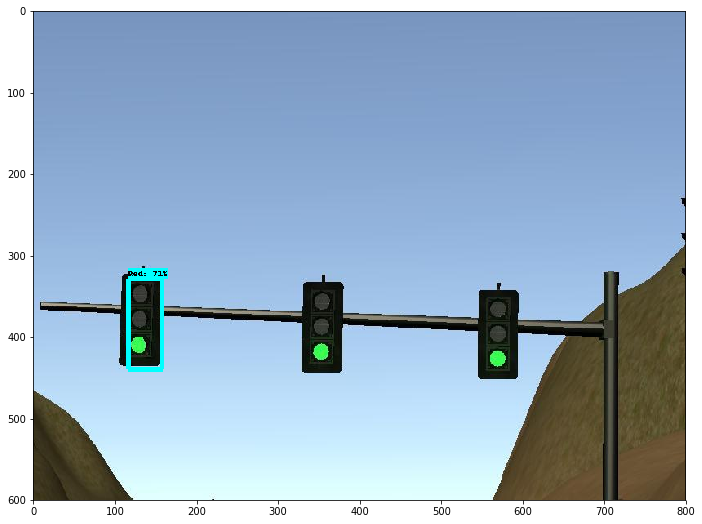

Red 0.712004


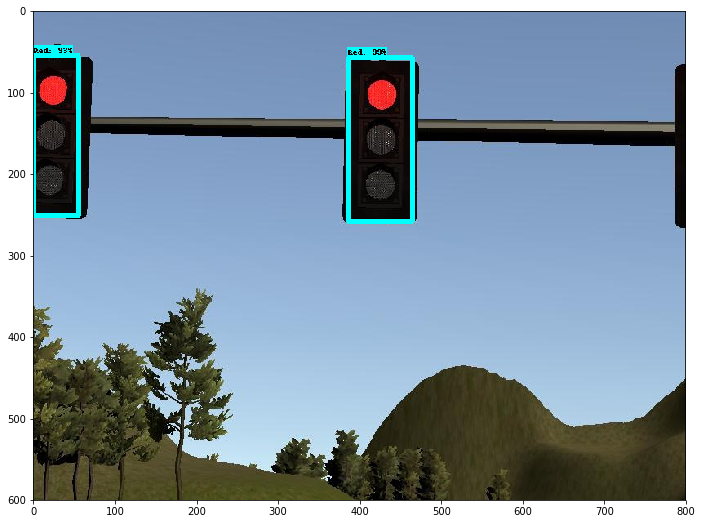

Red 0.991551
Red 0.931039


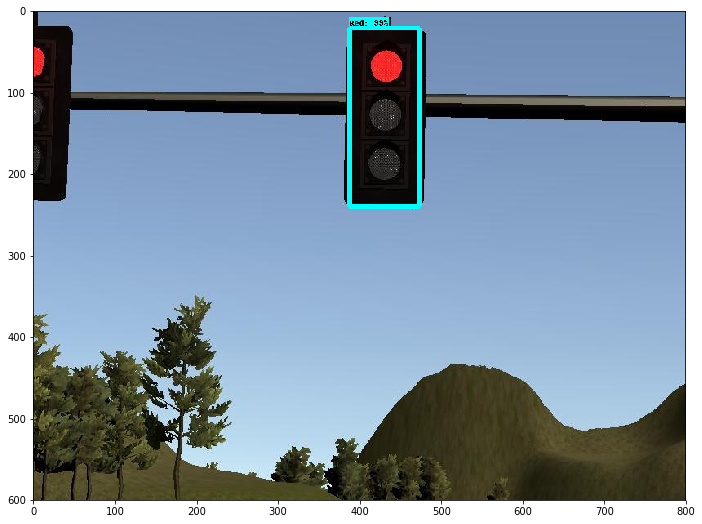

Red 0.994224


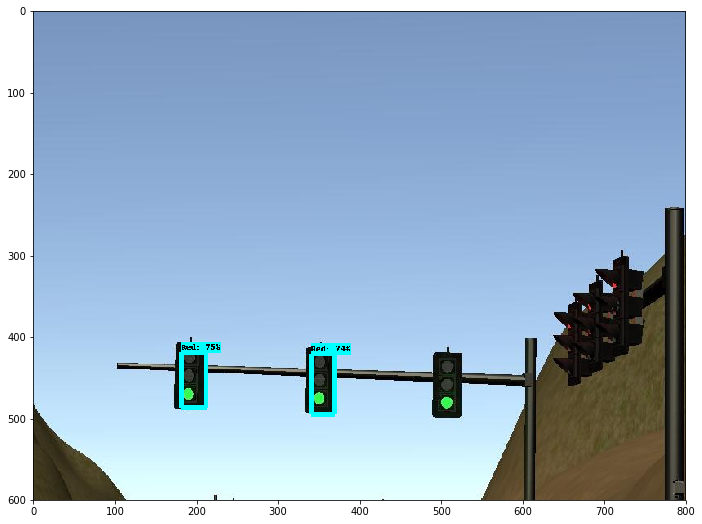

Red 0.753294
Red 0.74842
Red 0.327506


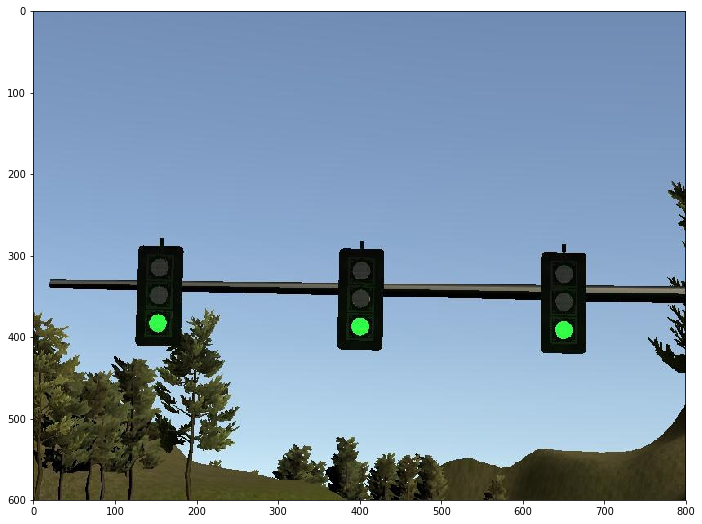

Red 0.309415


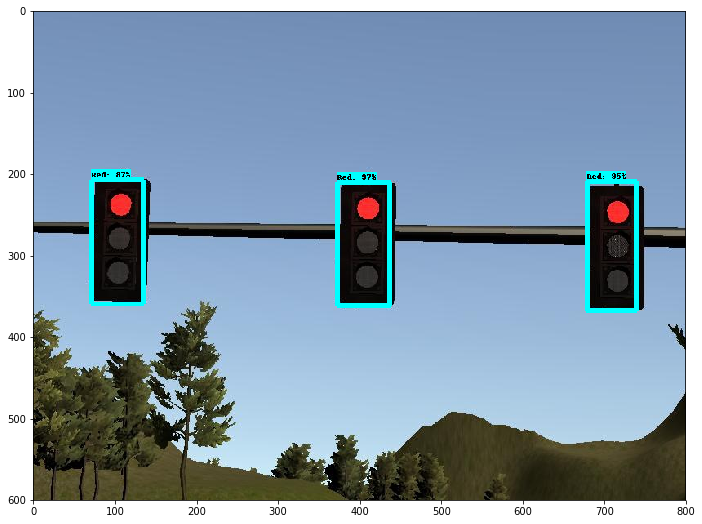

Red 0.974154
Red 0.950225
Red 0.875361


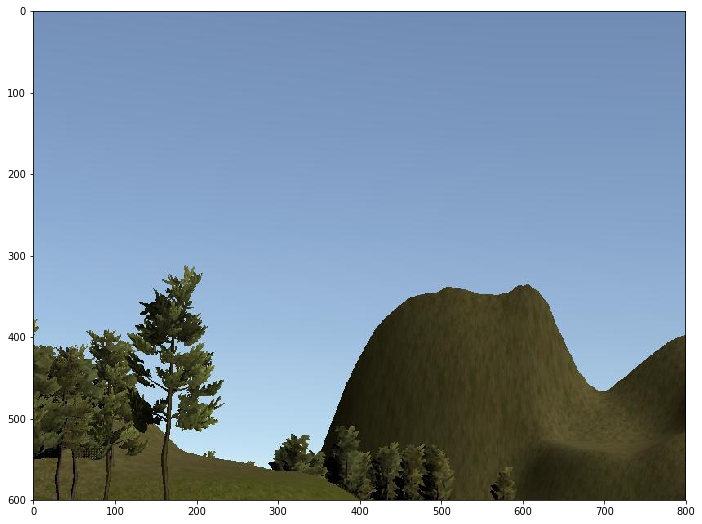

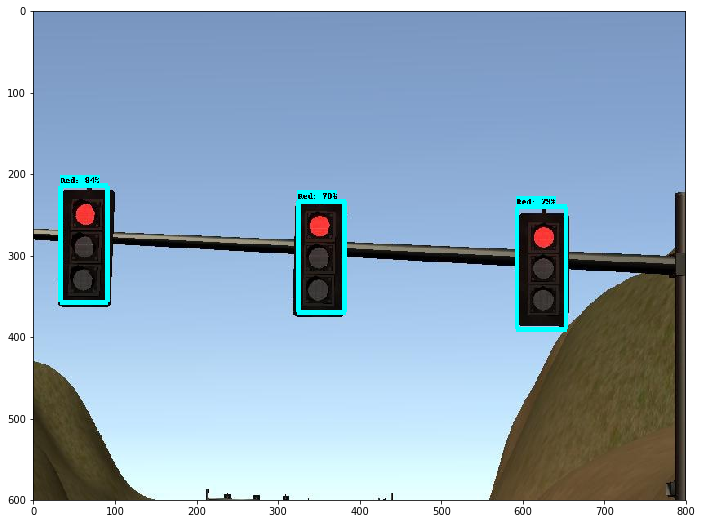

Red 0.941902
Red 0.796202
Red 0.700028
Red 0.472315
Red 0.389638
Red 0.321932


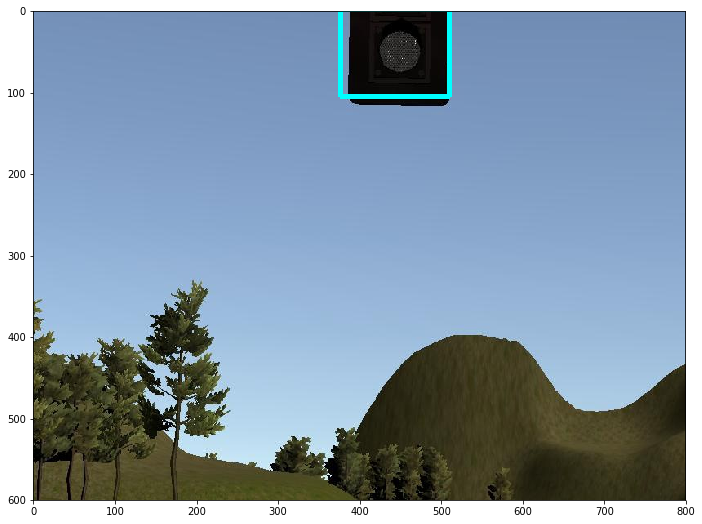

Red 0.963139


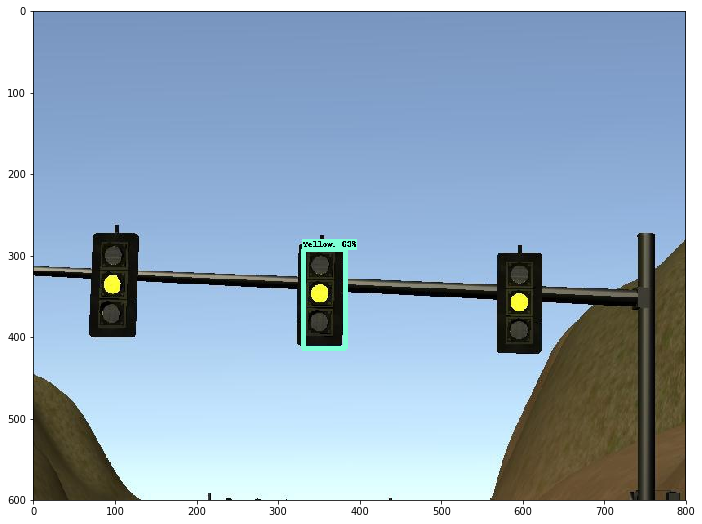

Yellow 0.635769
Red 0.430185
Red 0.416341
Red 0.371259


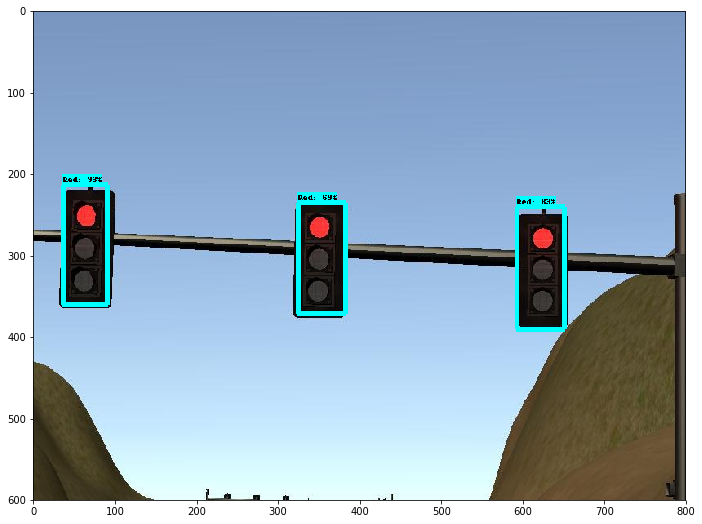

Red 0.936998
Red 0.830111
Red 0.699954
Red 0.474645
Red 0.397321
Red 0.35122


In [8]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

          
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .30
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.97428
                    fy =  1.73205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 700
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 500

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )


# SSD Mobilenet Model Test on Udacity Real Images 

In [9]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  graph_def = tf.GraphDef()

  with tf.gfile.GFile(Mobile_Net_SIM, 'rb') as fid:
        
    serialized_graph = fid.read()
    graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(graph_def, name='')

In [10]:
DIR_REAL_TEST_IMAGES = '/home/carla/Desktop/Carla_Traffic_Light_Detection/test_images_real'
TEST_IMAGE_PATHS = glob(os.path.join(DIR_REAL_TEST_IMAGES, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

IMAGE_SIZE = (13, 9)

Length of test images: 9


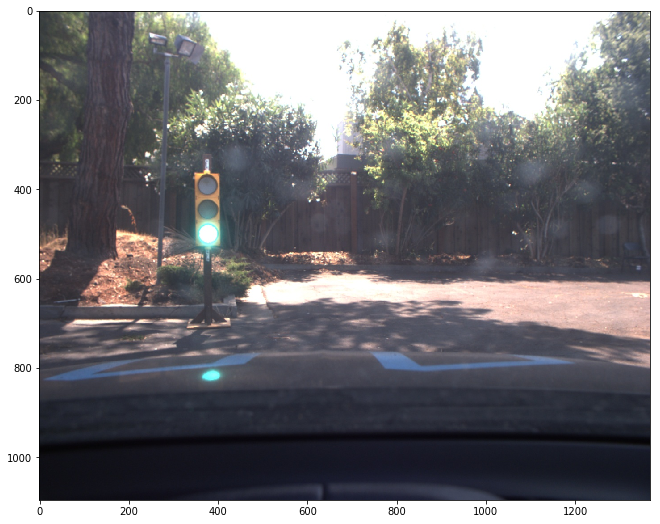

Red 0.478242
Red 0.455939


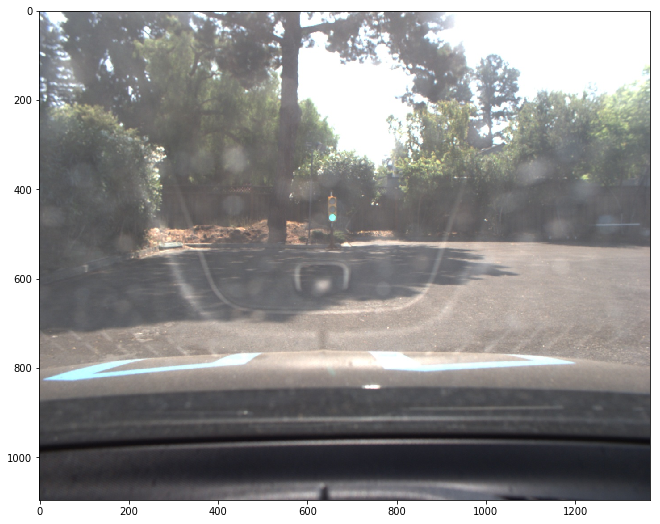

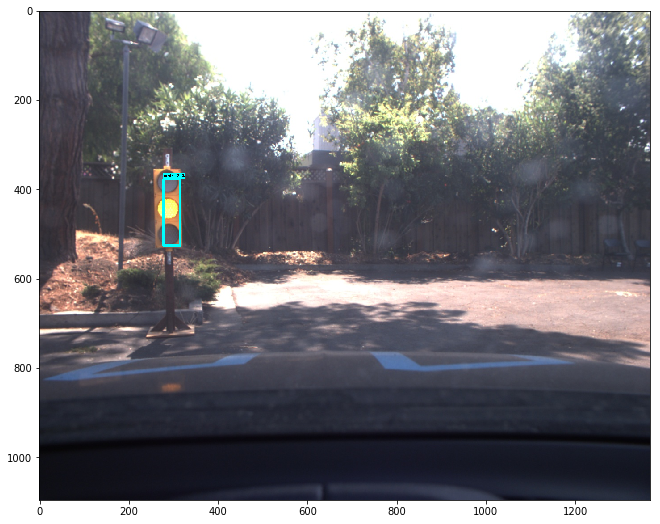

Red 0.719537
Red 0.306247


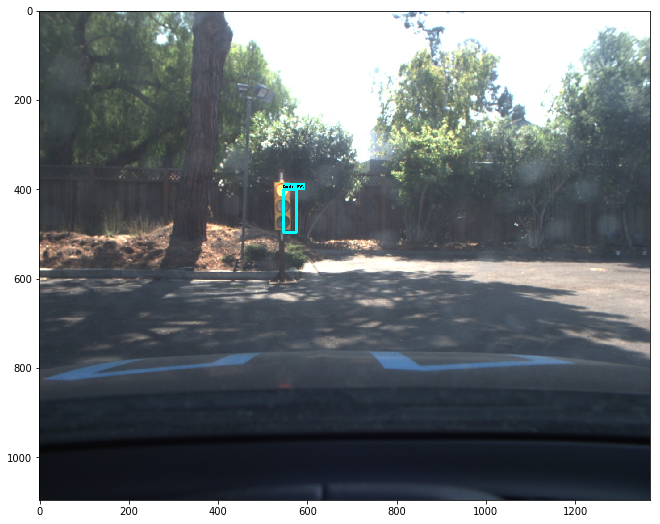

Red 0.995057


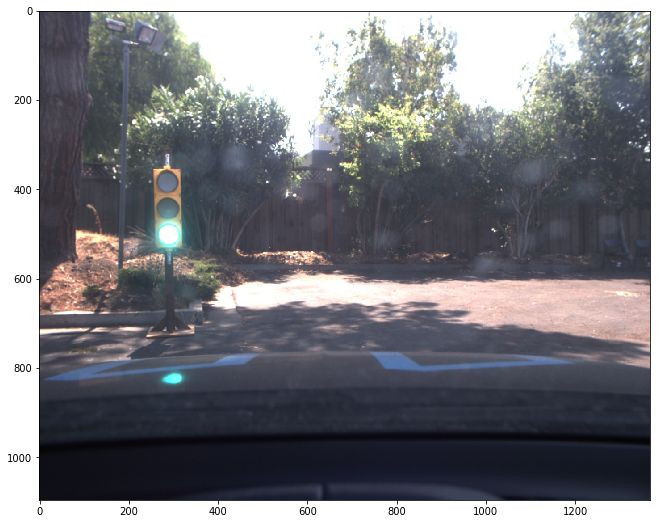

Red 0.457697
Red 0.358349


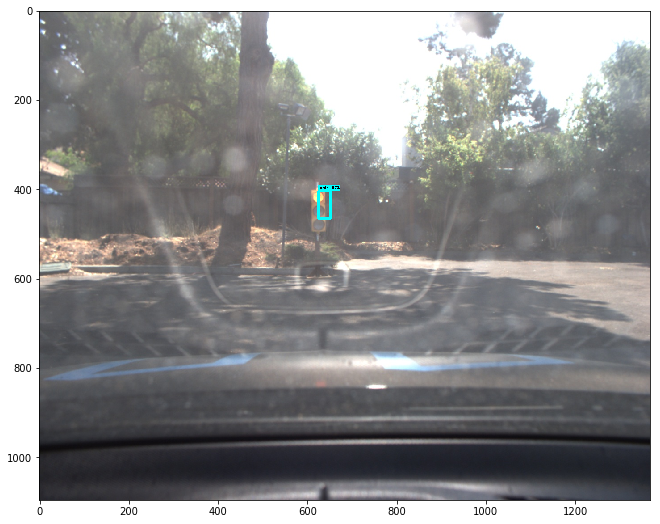

Red 0.973064


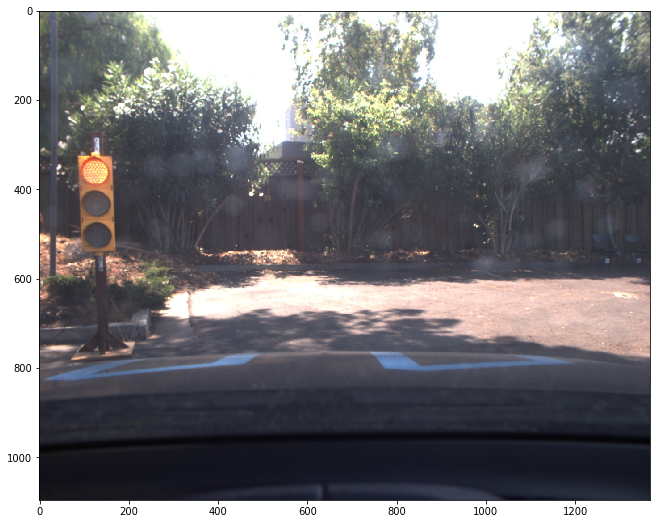

Red 0.478237


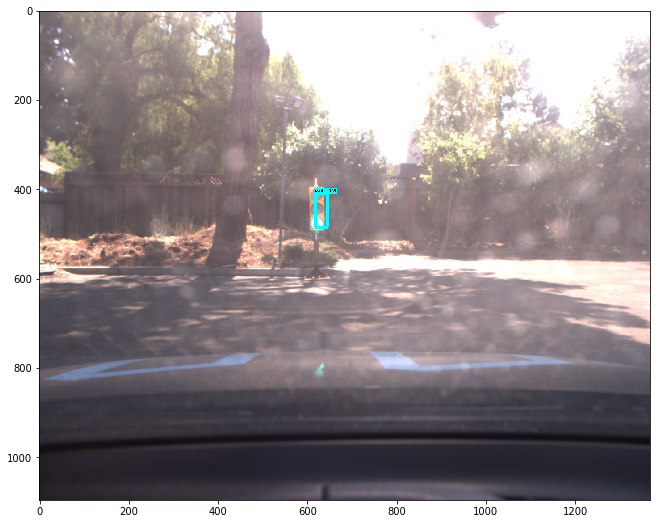

Red 0.763681


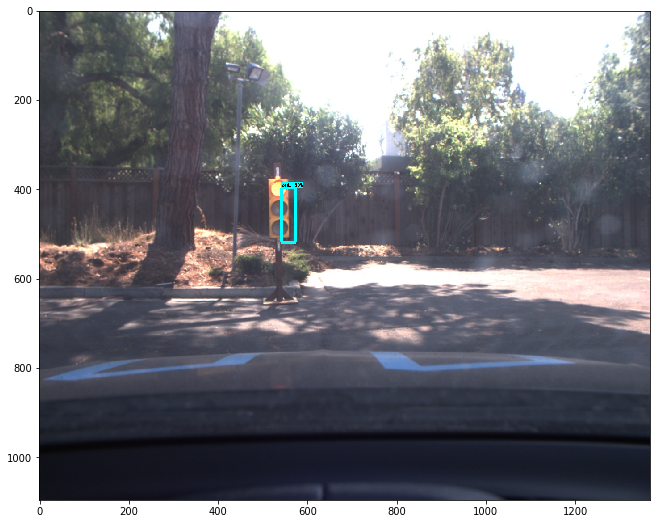

Red 0.993137


In [11]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

         
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

      
            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .30
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.95428
                    fy =  1.70205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 700
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 500

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )
